# Eda: Proyecto Individual 02: Telecomunicaciones

# Contexto

una empresa prestadora de servicios de telecomunicaciones nos encarga la realización de un análisis completo que permita reconocer el comportamiento de este sector a nivel nacional. Considerar que la principal actividad de la empresa es brindar acceso a internet, pero también es importante considerar el comportamiento asociado al resto de los servicios de comunicación, con el fin de orientar a la empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y poder plantear soluciones personalizadas a sus posibles clientes.

# HistoryTelling

Considerando la principal actividad de la empresa como brindar acceso a internet, un analisis sobre los accesos, el porcentaje de penetracion de internet y las velocidades no pueden pasar por alto sin analizar con lupa.

Bajo esta situacion, situaremos objetivos:

- Investigar los datos para saber el rango de velocidad de accesos a internet que mas se demanda.
- Increpar en los datos para saber cual es la tecnologia mas usada.
- Mediante el uso de kpis, medir si se logro la meta propuesta o no sobre el % de penetracion de internet en los hogares.



### Hojas de interes:


**1. Acc_vel_loc_sinrangos:** Acc_vel_loc_sinrangos: Datos de acceso por localidad sin rangos de velocidad. Esta tabla nos permitirá conocer los accesos a internet por diferentes velocidades de conexión en cada localidad.

**2. Velocidad_sin_rangos**: Información sobre la velocidad de conexión a internet sin rangos específicos.
Esta tabla se usara para graficar los rangos de velocidad de internet para los accesos atraves del tiempo. Tambien nos ayudaran conocer la distribución de los accesos a internet por velocidad de conexión en cada provincia. 

**6. Totales Accesos por Tecnología:** Totales Accesos Por Tecnología: Totales de accesos a internet desglosados por tecnología.
Esta tabla nos permitirá conocer la cantidad de accesos a internet por tipo de tecnología (por ejemplo, fibra óptica, cable, ADSL) en cada provincia. Esta información podria llegar a ser importante para evaluar la infraestructura disponible en cada región

**8. Dial-BAf:** Presenta los datos de accesos dial-up y Banda Ancha Fija. Esto nos permitira analizar el tipo de acceso y tambien la cantidad de demanda ya de las los tipos de acceso.

**11. Penetración-hogares:** Penetración-poblacion: Penetración de internet en la población. Esta información es fundamental para calcular el KPI, ya que te permitirá determinar el punto de partida (acceso actual) para cada provincia.

**15. Ingresos:** Ingresos: Ingresos generados por los servicios de internet en miles de pesos. Esta información es importante para evaluar la rentabilidad del negocio en cada región.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_avl = pd.read_parquet('data_pi02/df_telecom_1.parquet',engine='pyarrow') # Accesos velocidad por localidad
df_vsr = pd.read_parquet('data_pi02/df_telecom_2.parquet',engine='pyarrow') # velocidad sin rangos
df_ph = pd.read_parquet('data_pi02/df_telecom_11.parquet',engine='pyarrow') # penetracion hogar
df_db = pd.read_parquet('data_pi02/df_telecom_8.parquet',engine='pyarrow') # dial baf
df_tat = pd.read_parquet('data_pi02/df_telecom_6.parquet',engine='pyarrow') # totales accesos por tecnologia
df_apv = pd.read_parquet('data_pi02/df_telecom_14.parquet',engine='pyarrow') # accesos por velocidad
df_i = pd.read_parquet('data_pi02/df_telecom_15.parquet',engine='pyarrow') # ingresos

# 0. Valores Faltantes

#### Se trataron en el apartado ETL_Carga_Datos donde se realizo su respectiva carga, transformacion y tratamiento para introducirla en Sql server donde fue necesario no contar con valores nulos. Considerar que tambien se trataron duplicados.

# 0.1 Valores atipicos y duplicados

In [34]:
df_avl.columns

Index(['Provincia', 'Partido', 'Localidad', 'link', 'Mbps_5', 'Mbps_10',
       'Mbps_50', 'Mbps_100', 'Mbps_500', 'Mbps_1000'],
      dtype='object')

In [76]:
print("Valores duplciados de la data:",df_avl.duplicated().sum())
round(df_avl.describe()[2:3])

Valores duplciados de la data: 0


,link,Mbps_5,Mbps_10,Mbps_50,Mbps_100,Mbps_500,Mbps_1000
std,30022166.0,1870.0,2445.0,6691.0,508.0,22663.0,1275.0


In [70]:
print("Valores duplciados de la data:",df_vsr.duplicated().sum())
round(df_vsr.describe()[2:3])

0


,Año,Trimestre,Otros,Mbps_5,Mbps_10,Mbps_50,Mbps_100,Mbps_500,Mbps_1000,Mbps_5000,Mbps_10000
std,2.0,1.0,17026.0,65764.0,216710.0,352143.0,191590.0,172585.0,12770.0,100.0,2.0


In [71]:
print("Valores duplciados de la data:",df_ph.duplicated().sum())
round(df_ph.describe()[-1:])

0


,Año,Trimestre,acceso_cada_100_hogares,Periodo
std,3.0,1.0,24.0,NaN


In [72]:
print("Valores duplciados de la data:",df_db.duplicated().sum())
round(df_db.describe()[2:3])

0


,Año,Trimestre,banda_ancha_fija,dialup,Total
std,3.0,1.0,776137.0,2309.0,777895.0


In [73]:
print("Valores duplciados de la data:",df_tat.duplicated().sum())
round(df_tat.describe()[2:3])

0


,Año,Trimestre,ADSL,Cablemodem,fibraoptica,Wireless,Otros,Total
std,3.0,1.0,1027693.0,1308010.0,1179722.0,197049.0,82679.0,1655946.0


In [74]:
print("Valores duplciados de la data:",df_apv.duplicated().sum())
round(df_apv.describe()[2:3])

0


,Año,Trimestre,kbps_512,kbps_1024,Mbps_6,Mbps_10,Mbps_20,Mbps_30,Mbps_mas_30,OTROS,Total
std,3.0,1.0,12889.0,21019.0,328175.0,64565.0,89537.0,70535.0,434786.0,14504.0,774085.0


In [75]:
print("Valores duplciados de la data:",df_i.duplicated().sum())
round(df_i.describe()[2:3])

0


,Año,Trimestre,Ingresos
std,4.0,1.0,38503039.0


# 1. Dataframe: Acc_vel_loc_sinrangos

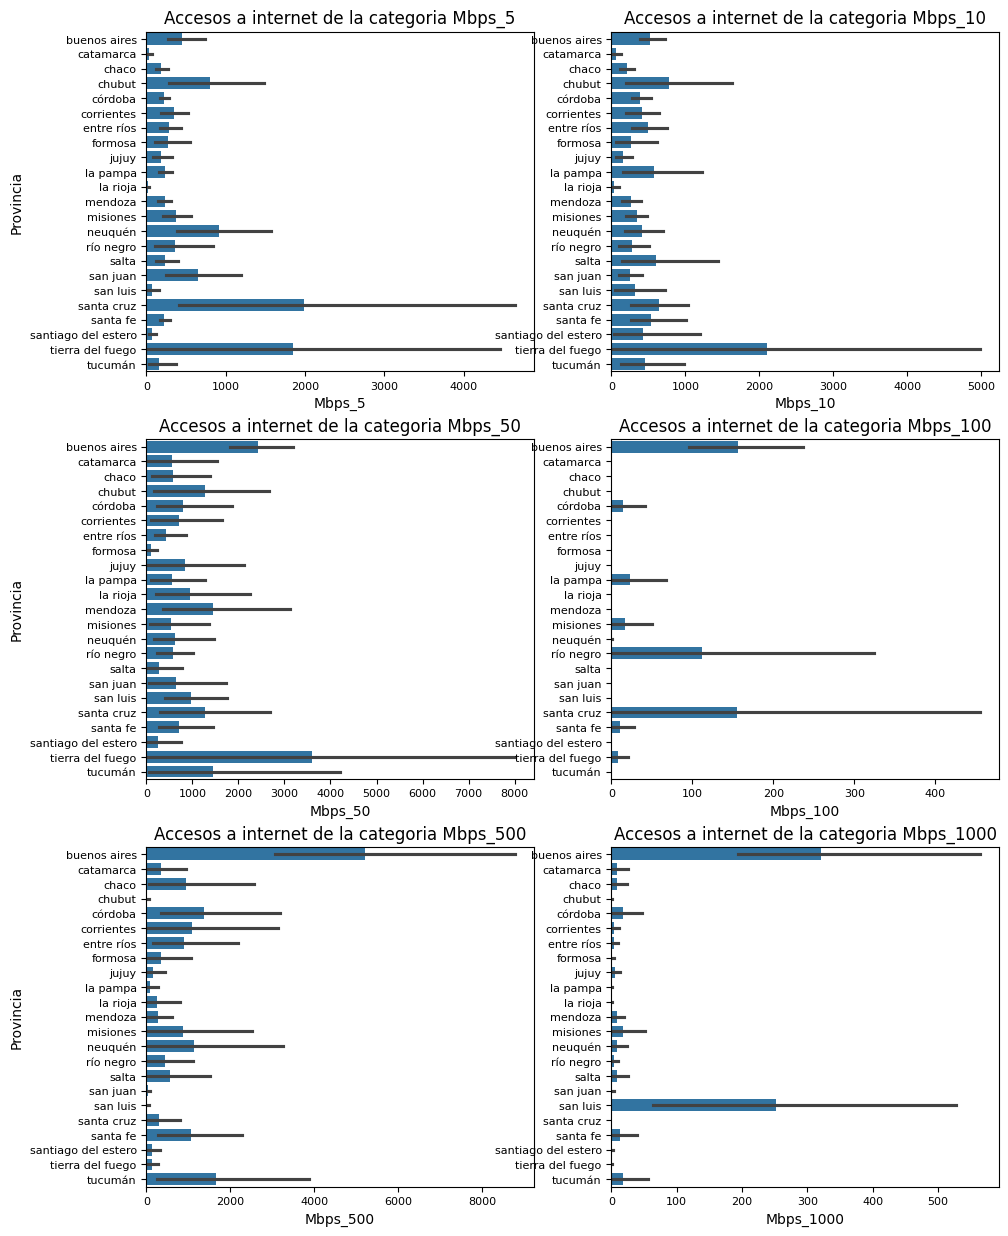

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(11, 15))
sns.barplot(x=df_avl['Mbps_5'], y=df_avl['Provincia'],ax=axes[0][0])
axes[0][0].set_title('Accesos a internet de la categoria Mbps_5')
sns.barplot(x=df_avl['Mbps_10'], y=df_avl['Provincia'],ax=axes[0][1])
axes[0][1].set_title('Accesos a internet de la categoria Mbps_10')
sns.barplot(x=df_avl['Mbps_50'], y=df_avl['Provincia'],ax=axes[1][0])
axes[1][0].set_title('Accesos a internet de la categoria Mbps_50')
sns.barplot(x=df_avl['Mbps_100'], y=df_avl['Provincia'],ax=axes[1][1])
axes[1][1].set_title('Accesos a internet de la categoria Mbps_100')
sns.barplot(x=df_avl['Mbps_500'], y=df_avl['Provincia'],ax=axes[2][0])
axes[2][0].set_title('Accesos a internet de la categoria Mbps_500')
sns.barplot(x=df_avl['Mbps_1000'], y=df_avl['Provincia'],ax=axes[2][1])
axes[2][1].set_title('Accesos a internet de la categoria Mbps_1000')

#ax = plt.gca()
axes[0][0].tick_params(labelsize=8)
axes[0][1].tick_params(labelsize=8)
axes[1][0].tick_params(labelsize=8)
axes[1][1].tick_params(labelsize=8)
axes[2][0].tick_params(labelsize=8)
axes[2][1].tick_params(labelsize=8)
axes[0][1].set_ylabel('')
axes[1][1].set_ylabel('')
axes[2][1].set_ylabel('')
plt.show()

Santa cruz y Tierra del fuego, son las provincias con mayores accesos a internet hasta 5 megas y Tierra del fuego para los accesos a internet de 5 a 10 megas.

Ya en las ultimas categorias es donde Buenos Aires posee mayor cantidad de accesos, donde en la categoria de Mbps_1000 San Luis tambien se encuentra con casi las mismas cantidad de accesos.

Tambien se destacan la poca cantidad accesos en la categoria Mbps100(de 50 a 100 megas) y Mbps1000(de 500 a 1000 megas).

# 2. Dataset: Velocidad sin rango

Con el fin de analizar atraves del tiempo a estas categorias, se usara el dataset de velocidad_sin_rango para este fin.

Debido a la poca cantidad de accesos de las categorias 1000 a 10000 y otros, no se usaran para el analisis.

### 2.1 Analisis temporal de las categorias de velocidad

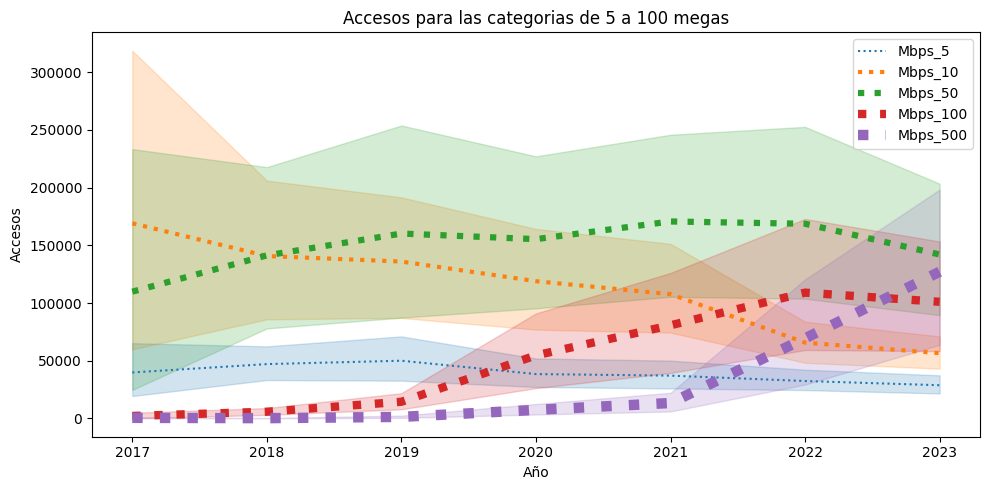

In [6]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data=df_vsr, x='Año',y='Mbps_5', ax=axes,label='Mbps_5',linewidth=1.5,linestyle=':')
sns.lineplot(data=df_vsr, x='Año',y='Mbps_10', ax=axes,label='Mbps_10',linewidth=3,linestyle=':')
sns.lineplot(data=df_vsr, x='Año',y='Mbps_50', ax=axes,label='Mbps_50',linewidth=4.5,linestyle=':')
sns.lineplot(data=df_vsr, x='Año',y='Mbps_100', ax=axes,label='Mbps_100',linewidth=6,linestyle=':')
sns.lineplot(data=df_vsr, x='Año',y='Mbps_500', ax=axes,label='Mbps_500',linewidth=7.5,linestyle=':')
axes.set_title('Accesos para las categorias de 5 a 100 megas')
plt.ylabel('Accesos')
plt.tight_layout()
plt.show()

Las primeras 3 categorias (Mbps_5,Mbps_10,Mbps_50) tienen en particular, una pendiente negativa en los últimos años.Considerando la categoria Mbps_10 que durante todos los periodos, tiende a la baja(Considerar analizar años anteriores para tener un historial de su comportamiento)

Para las 2 ultimas categorias podria decirse que:
A partir del año 2019, la categoria Mbps_100 comenzo a tener una pendiente positva luego experimentó una desaceleración en su crecimiento en el año 2022. Esta tendencia podría estar relacionada con la creciente demanda de contenido multimedia de alta definición y la necesidad de contar con mayor ancho de banda para aplicaciones como el teletrabajo y los juegos en línea.

La categoria Mbps_500 comenzo a tener una pendiente mas **pronunciada** y dando en parte, en comparacion con las demas rectas, que tienden a la baja y la tendencia al alza en Mbps_500 podría indicar una creciente demanda de mayores velocidades en los servicios de internet.


# 3. Dataset: Totales acceso por Tecnologias

### 3.1  Distribucion de los tipos de tecnologias

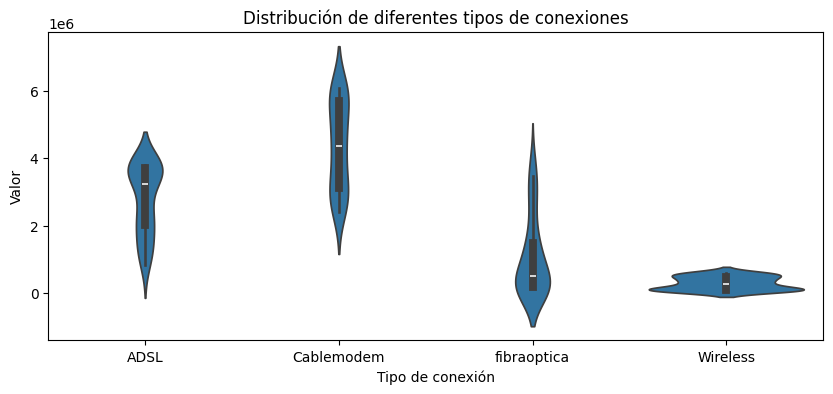

In [7]:
df_melted = df_tat.drop(columns=['Periodo','Otros','Año','Trimestre','Total'])
df_melted = df_melted.melt(var_name='Tipo', value_name='Valor')
# Crear el violin plot en una sola gráfica
plt.figure(figsize=(10, 4))
sns.violinplot(x='Tipo', y='Valor', data=df_melted)
plt.title('Distribución de diferentes tipos de conexiones')
plt.ylabel('Valor')
plt.xlabel('Tipo de conexión')
plt.show()

Podemos observar que en el tipo de tecnologia por Wireless, existe una distribución concentrada con alta densidad en la zona central. Por el contrario la tecnologia por cable modem es la que posee mayor dispersion en los datos.

### 3.2 Tipos de tecnologia por año

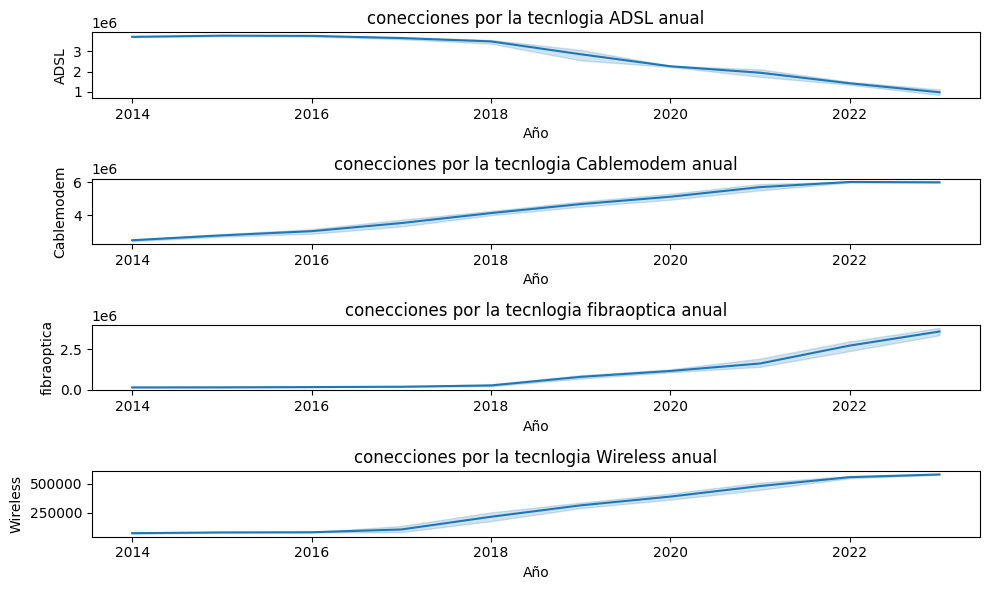

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(10, 6))
# Graficar la evolución de cada variable a través del tiempo
sns.lineplot(data=df_tat, x='Año', y='ADSL', ax=axes[0])
axes[0].set_title('conecciones por la tecnlogia ADSL anual')
sns.lineplot(data=df_tat, x='Año', y='Cablemodem', ax=axes[1])
axes[1].set_title('conecciones por la tecnlogia Cablemodem anual')
sns.lineplot(data=df_tat, x='Año', y='fibraoptica', ax=axes[2])
axes[2].set_title('conecciones por la tecnlogia fibraoptica anual')
sns.lineplot(data=df_tat, x='Año', y='Wireless', ax=axes[3])
axes[3].set_title('conecciones por la tecnlogia Wireless anual')
plt.tight_layout()
plt.show()

Concluimos que la tecnologia ADSL tiene una tendencia hacia la baja, lo contrario a la fibra optica que parece tener tendencia alcista.

# 4. Dataset: Dial-baf
Presenta los datos de accesos dial-up y Banda Ancha Fija.

Dial-Up: son conexiones que se realizan a través de una llamada telefónica local utilizando un aparato denominado módem o modulador/demodulador.

Banda Ancha Fija: Se refiere la cantidad de accesos de internet que se realizan.

### 4.1 Distribucion y outliers: Dial baf

Text(0.5, 1.0, 'Conecciones de dial up')

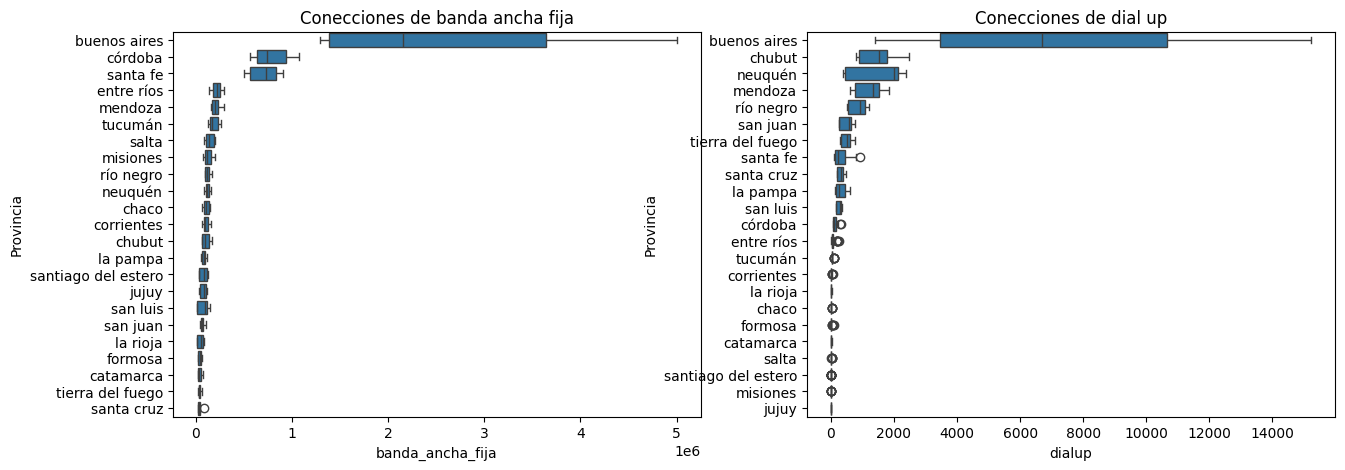

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
provincias_ordenadas = df_db.groupby('Provincia')['banda_ancha_fija'].sum().sort_values(ascending=False).index
sns.boxplot(data=df_db,x='banda_ancha_fija',y='Provincia',ax=ax[0],order=provincias_ordenadas)
#sns.heatmap(heatmap_data, ax=ax, cmap="YlGnBu",yticklabels=provincias_ordenadas)
ax[0].set_title('Conecciones de banda ancha fija')
provincias_ordenadas = df_db.groupby('Provincia')['dialup'].sum().sort_values(ascending=False).index
sns.boxplot(data=df_db,x='dialup',y='Provincia',ax=ax[1],order=provincias_ordenadas)
#sns.heatmap(heatmap_data, ax=ax, cmap="YlGnBu",yticklabels=provincias_ordenadas)
ax[1].set_title('Conecciones de dial up')

En ambos casos, buenos aires tiene la mayor cantidad de conecciones, tanto de banda ancha como de dial up o llamadas telefonicas locales.

# 5. Dataframe: Penetracion por hogar
Es el porcentaje de hogares o individuos que tienen acceso a internet en una determinada área geográfica. Se puede medir en términos de penetración en la población o en los hogares.


### 5.1 Distribucion del porcentaje de individuos que tienen acceso a internet por provincia y trimestre 

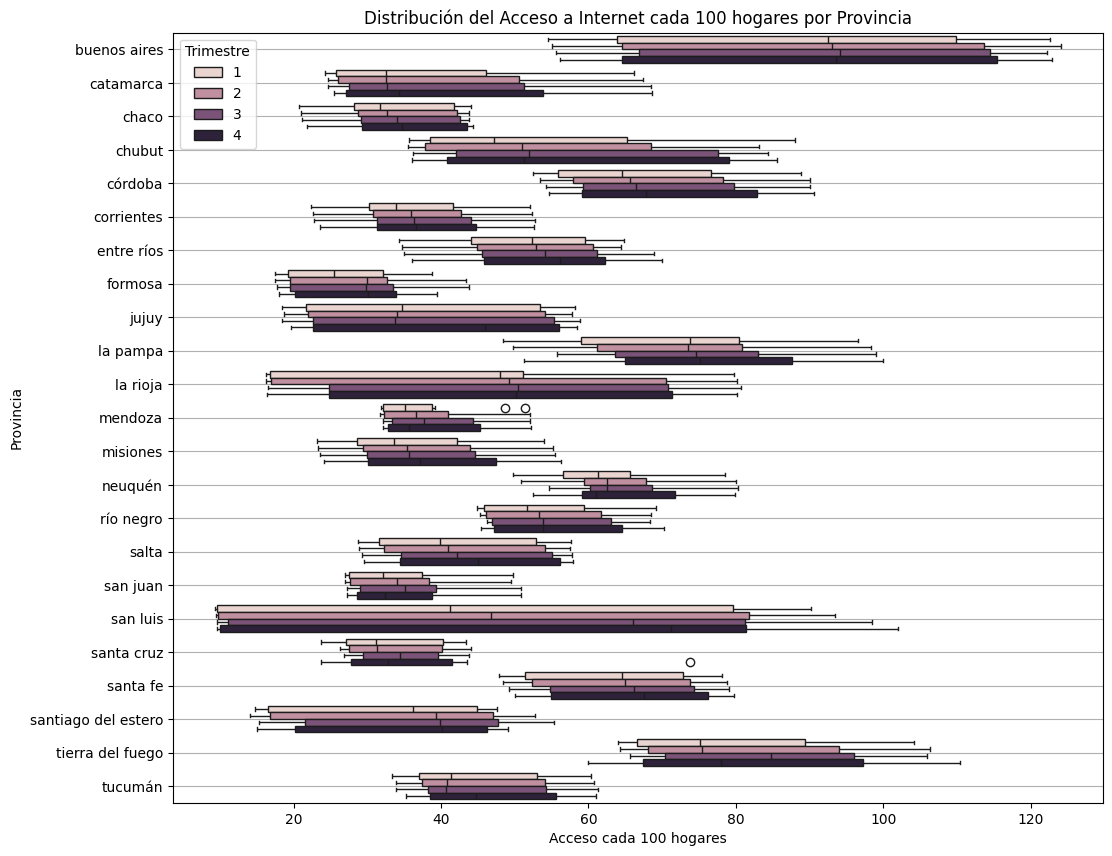

In [10]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_ph, y='Provincia', x='acceso_cada_100_hogares',hue='Trimestre')
plt.title('Distribución del Acceso a Internet cada 100 hogares por Provincia')
plt.xlabel('Acceso cada 100 hogares')
plt.ylabel('Provincia')
plt.grid(visible=True,axis='y')
plt.show()

Podemos observar que san luis y buenos aires poseen la mayor cantidad de accesos cada 100 hogares, y tambien que la distribucion entre los trimestres no varian tanto de uno a otro salvo algunas excepciones como mendoza.

C:\Users\Pablo\AppData\Local\Temp\ipykernel_8712\1450894284.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ph['Periodo'] = pd.to_datetime(df_ph['Año'].astype(str) + 'Q' + df_ph['Trimestre'].astype(str))


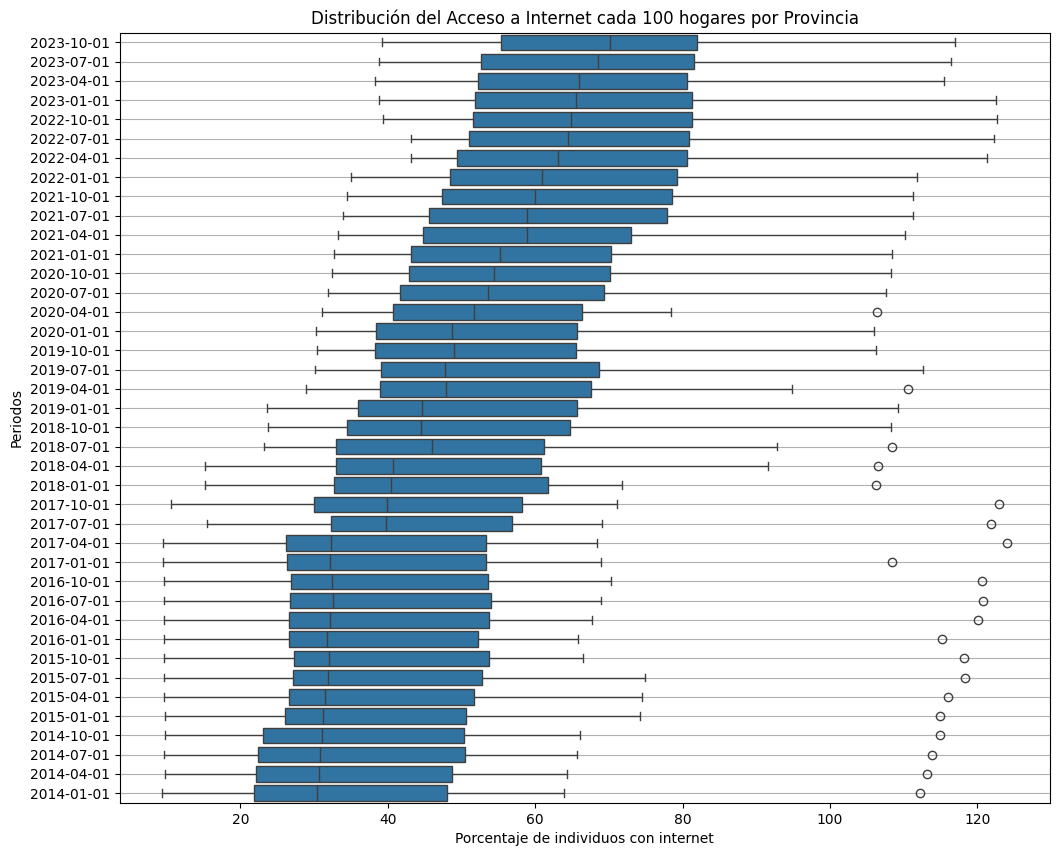

In [11]:
df_ph['Periodo'] = pd.to_datetime(df_ph['Año'].astype(str) + 'Q' + df_ph['Trimestre'].astype(str))
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_ph, y='Periodo', x='acceso_cada_100_hogares')
plt.title('Distribución del Acceso a Internet cada 100 hogares por Provincia')
plt.xlabel('Porcentaje de individuos con internet')
plt.ylabel('Periodos')
plt.grid(visible=True,axis='y')
plt.show()

Podemos ver algunos valores atipicos muy alejados de la media para el porcentaje de penetracion del internet cada 100 hogares

### 5.2 Outliers y distribucion: penetracion hogares

Text(0.5, 1.0, 'Cantidad de conexiones de 6 megas por año')

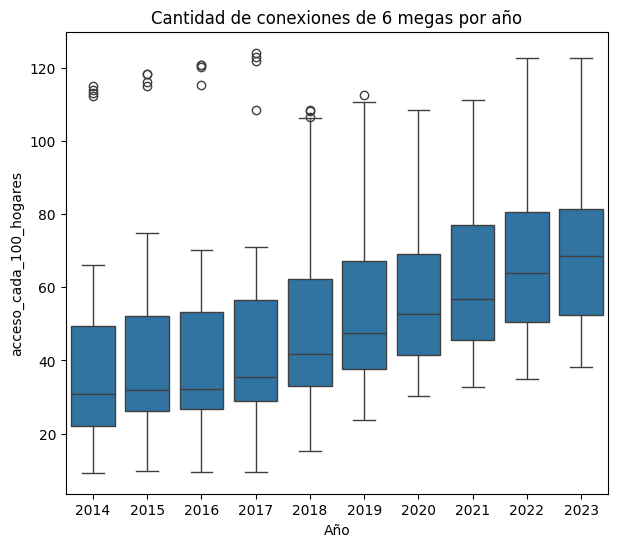

In [12]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(data=df_ph,x='Año',y='acceso_cada_100_hogares')
#sns.heatmap(heatmap_data, ax=ax, cmap="YlGnBu",yticklabels=provincias_ordenadas)
ax.set_title('Cantidad de conexiones de 6 megas por año')

A medida que se avanza, la distribucion aumenta, pero desde un piso mas elevado. Podemos concluir que a medida que avanzan los años el porcentaje de personas que acceden a internet es mayor.

Tambien se observar que en los primeros años existen valores muy fuera de la media o atipicos, y en los años siguientes pasaron a entrar dentro de la caja, considerando el hecho de que al sacar nuevas tecnologias de internet o nuevos planes de compra, estos outliers podrian llegar a aparecer nuevamente en los datos.

# 6. Dataframe: Ingresos

#### Distribucion y evolucion de los ingresos a lo largo de los años

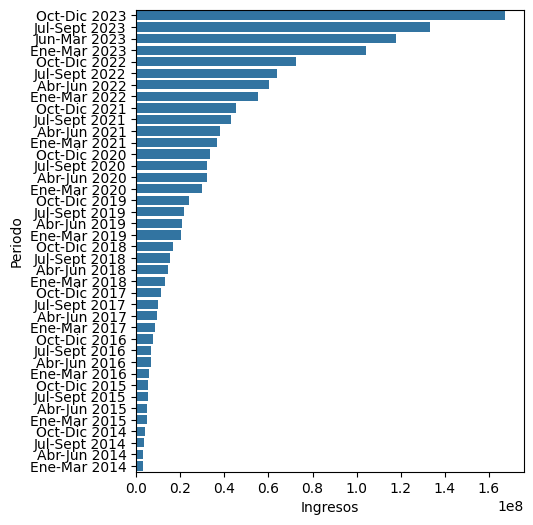

In [24]:
plt.figure(figsize=(5,6))
sns.barplot(data=df_i,x='Ingresos',y='Periodo')
plt.show()

Al parecer, los aumentos de los ingresos de la empresa se podria llegar a parecer una funcion exponencial donde cada vez la aceleracion de los ingresos año tras año es mayor.